## Introduction

*The goal of this analysis is to visualize key patterns in revenue, tips, and customer behavior identified in previous notebooks.
Visual insights are used to support business-oriented conclusions and actionable recommendations.*

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Load Data 


In [109]:
df = pd.read_csv("tips.csv")


## Prepare columns

In [110]:
# Segment bill
if "bill_segment" not in df.columns:
    df["bill_segment"] = pd.cut(
        df["total_bill"],
        bins=[-float("inf"), 15, 30, float("inf")],
        labels=["Low (<15)", "Medium (15–30)", "High (>30)"]
    )


In [111]:
# Weekend vs weekday
if "is_weekend" not in df.columns:
    df["is_weekend"] = df["day"].isin(["Sat", "Sun"]).map({True: "Weekend", False: "Weekday"})


In [112]:
#  Days and segments order (important for charts)
day_order = ["Thur", "Fri", "Sat", "Sun"]
seg_order = ["Low (<15)", "Medium (15–30)", "High (>30)"]

df["day"] = pd.Categorical(df["day"], categories=day_order, ordered=True)
df["bill_segment"] = pd.Categorical(df["bill_segment"], categories=seg_order, ordered=True)


# Average Bill and Tip by Bill Segment

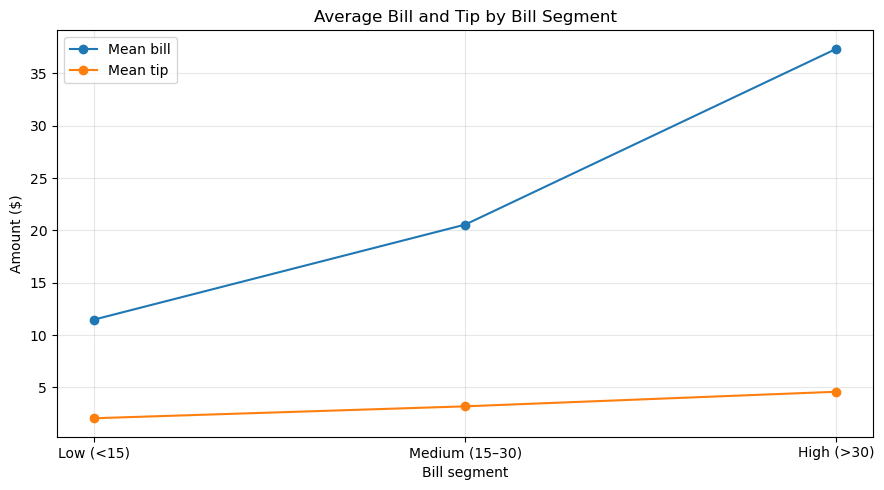

,bill_segment,mean_bill,mean_tip,n
0,Low (<15),11.480375,2.050250,80
1,Medium (15–30),20.559470,3.188636,132
2,High (>30),37.359063,4.583125,32


In [113]:
agg_seg = (
    df.groupby("bill_segment", observed=True)
      .agg(mean_bill=("total_bill", "mean"),
           mean_tip=("tip", "mean"),
           n=("total_bill", "size"))
      .reset_index()
)

plt.figure(figsize=(9, 5))
plt.plot(agg_seg["bill_segment"], agg_seg["mean_bill"], marker="o", label="Mean bill")
plt.plot(agg_seg["bill_segment"], agg_seg["mean_tip"], marker="o", label="Mean tip")
plt.title("Average Bill and Tip by Bill Segment")
plt.xlabel("Bill segment")
plt.ylabel("Amount ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
savefig("01_avg_bill_tip_by_segment.png")
plt.show()

agg_seg


# Number of Orders by Day of Week

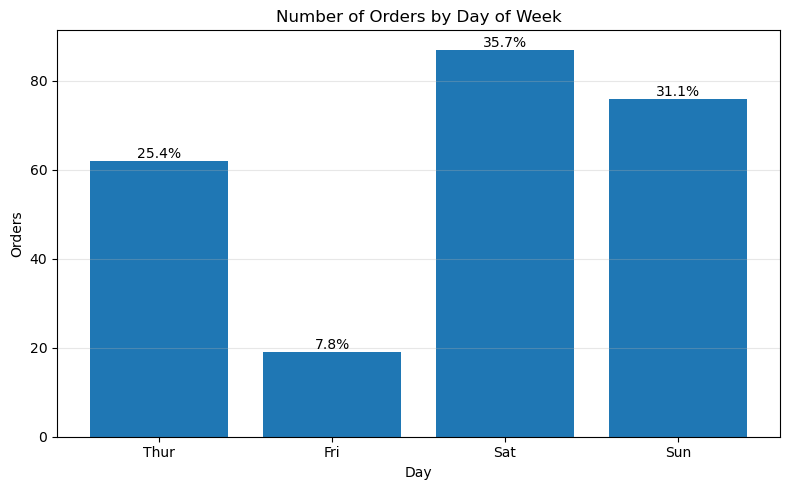

In [114]:
plt.figure(figsize=(8, 5))
plt.bar(orders_by_day["day"], orders_by_day["orders"])
plt.title("Number of Orders by Day of Week")
plt.xlabel("Day")
plt.ylabel("Orders")
plt.grid(axis="y", alpha=0.3)

# dodaj % nad słupkami
for i, (orders, pct) in enumerate(zip(orders_by_day["orders"], orders_by_day["pct"])):
    plt.text(i, orders, f"{pct:.1f}%", ha="center", va="bottom")

plt.tight_layout()
savefig("02_orders_by_day.png")
plt.show()



# Weekend vs Weekday: Average Bill and Tip

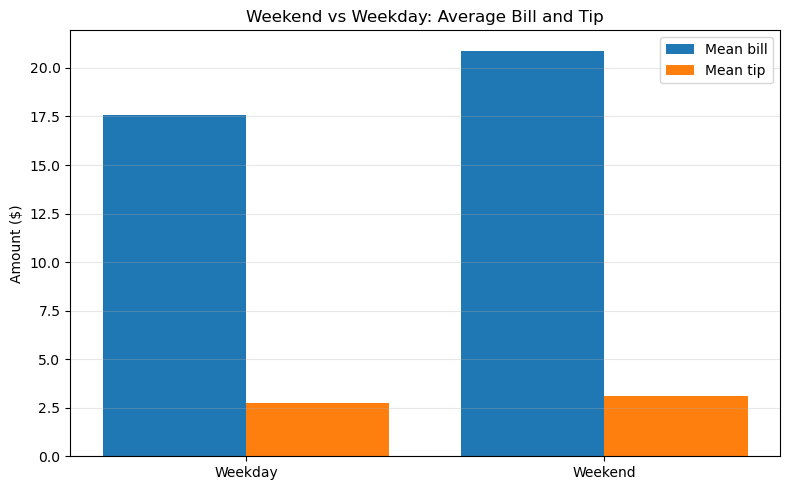

,is_weekend,mean_bill,mean_tip,n
0,Weekday,17.558148,2.762840,81
1,Weekend,20.893006,3.115276,163


In [115]:
agg_week = (
    df.groupby("is_weekend", observed=True)
      .agg(mean_bill=("total_bill", "mean"),
           mean_tip=("tip", "mean"),
           n=("total_bill", "size"))
      .reset_index()
)

fig, ax = plt.subplots(figsize=(8, 5))
x = range(len(agg_week))

ax.bar([i - 0.2 for i in x], agg_week["mean_bill"], width=0.4, label="Mean bill")
ax.bar([i + 0.2 for i in x], agg_week["mean_tip"], width=0.4, label="Mean tip")

ax.set_xticks(list(x))
ax.set_xticklabels(agg_week["is_weekend"])
ax.set_title("Weekend vs Weekday: Average Bill and Tip")
ax.set_ylabel("Amount ($)")
ax.grid(axis="y", alpha=0.3)
ax.legend()

plt.tight_layout()
savefig("03_weekend_vs_weekday_avg_bill_tip.png")
plt.show()

agg_week


# Average Bill by Segment and Weekend/Weekday

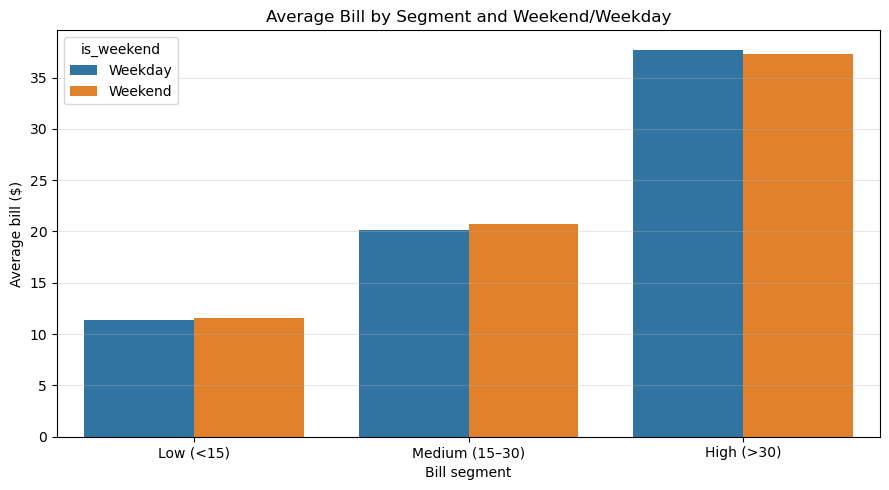

,bill_segment,is_weekend,mean_bill,mean_tip,n
0,Low (<15),Weekday,11.359722,1.919722,36
1,Low (<15),Weekend,11.579091,2.157045,44
2,Medium (15–30),Weekday,20.178974,3.155897,39
3,Medium (15–30),Weekend,20.719032,3.202366,93
4,High (>30),Weekday,37.713333,5.266667,6
5,High (>30),Weekend,37.277308,4.425385,26


In [116]:
seg_week = (
    df.groupby(["bill_segment", "is_weekend"], observed=True)
      .agg(mean_bill=("total_bill", "mean"),
           mean_tip=("tip", "mean"),
           n=("total_bill", "size"))
      .reset_index()
)

plt.figure(figsize=(9, 5))
sns.barplot(data=seg_week, x="bill_segment", y="mean_bill", hue="is_weekend")
plt.title("Average Bill by Segment and Weekend/Weekday")
plt.xlabel("Bill segment")
plt.ylabel("Average bill ($)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
savefig("04_avg_bill_by_segment_weekend_weekday.png")
plt.show()

seg_week


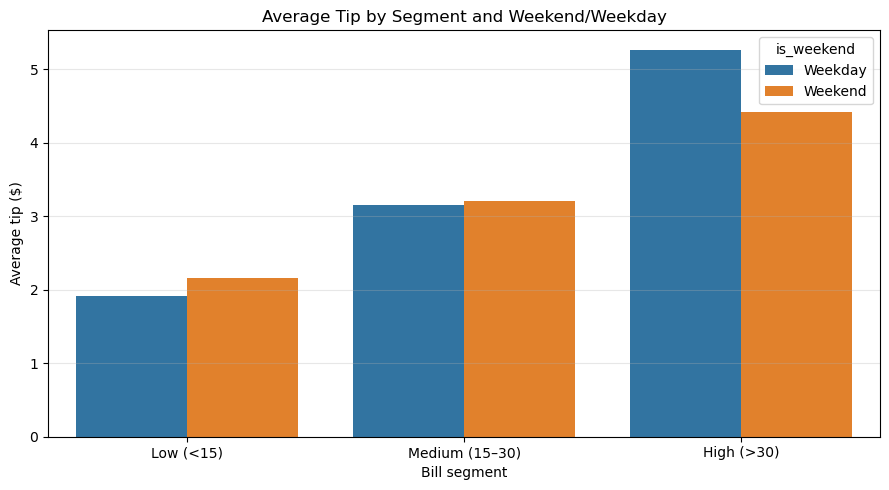

In [117]:
plt.figure(figsize=(9, 5))
sns.barplot(data=seg_week, x="bill_segment", y="mean_tip", hue="is_weekend")
plt.title("Average Tip by Segment and Weekend/Weekday")
plt.xlabel("Bill segment")
plt.ylabel("Average tip ($)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
savefig("05_avg_tip_by_segment_weekend_weekday.png")    
plt.show()


# Distribution of Total Bills and Tips

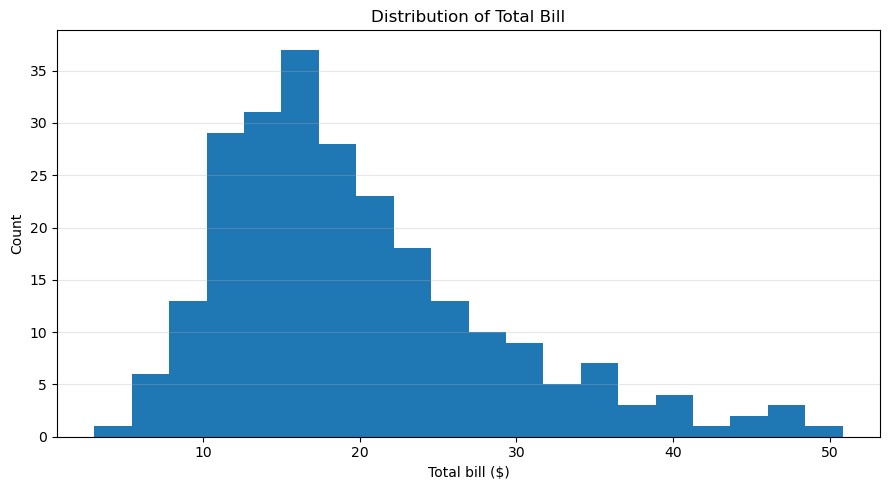

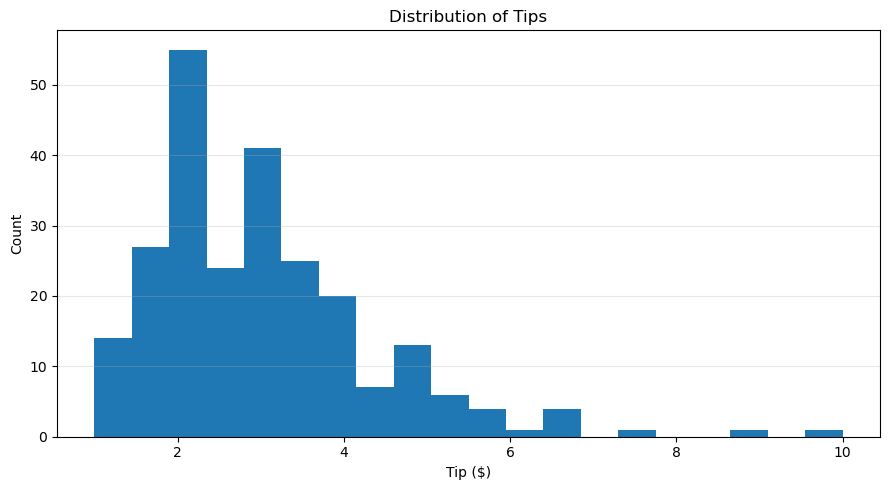

In [118]:
plt.figure(figsize=(9, 5))
plt.hist(df["total_bill"], bins=20)
plt.title("Distribution of Total Bill")
plt.xlabel("Total bill ($)")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 5))
plt.hist(df["tip"], bins=20)
plt.title("Distribution of Tips")
plt.xlabel("Tip ($)")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
savefig("06_distribution_of_tips.png")
plt.show()


# Correlation Tip vs Total Bill (scatter)

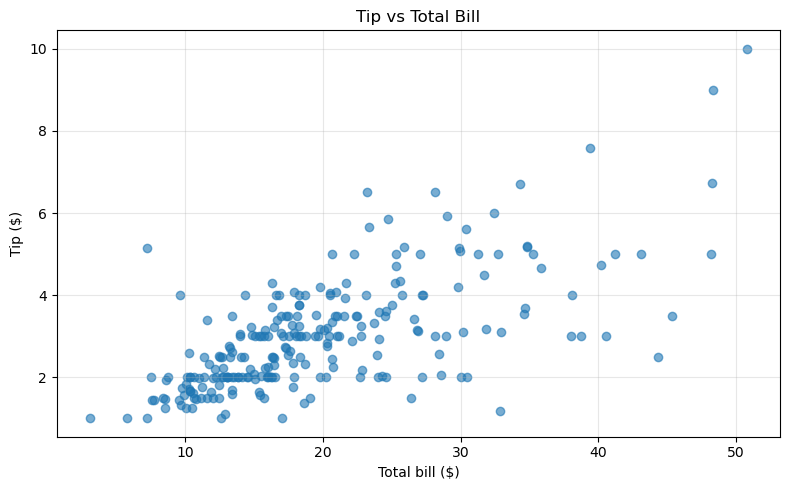

np.float64(0.6757341092113641)

In [119]:
plt.figure(figsize=(8, 5))
plt.scatter(df["total_bill"], df["tip"], alpha=0.6)
plt.title("Tip vs Total Bill")
plt.xlabel("Total bill ($)")
plt.ylabel("Tip ($)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
savefig("07_tip_vs_total_bill.png") 
plt.show()

corr = df["total_bill"].corr(df["tip"])
corr


## INSIGHTS
• Highest average bill segment: High (>30) ($37.36 avg bill).

• Highest average tip segment: High (>30) ($4.58 avg tip).

• Peak order volume day: Sat (87 orders, 35.7% of all).

• Weekend uplift vs weekday: +19.0% in average bill and +12.8% in average tip.

• Best revenue combination (segment × time): High (>30) on Weekday ($37.71 avg bill).

• Tip–bill correlation: 0.68 (higher means tips rise with bill size).


In [120]:
# --- Insight generator (numbers for narrative) ---

# 1) Segmenty: różnice rachunku i tipa
top_seg_bill = agg_seg.sort_values("mean_bill", ascending=False).iloc[0]
top_seg_tip = agg_seg.sort_values("mean_tip", ascending=False).iloc[0]

# 2) Dni: najwięcej zamówień
top_day_orders = orders_by_day.sort_values("orders", ascending=False).iloc[0]

# 3) Weekend vs weekday: różnice
weekend = agg_week[agg_week["is_weekend"] == "Weekend"].iloc[0]
weekday = agg_week[agg_week["is_weekend"] == "Weekday"].iloc[0]
bill_uplift_pct = (weekend["mean_bill"] / weekday["mean_bill"] - 1) * 100
tip_uplift_pct = (weekend["mean_tip"] / weekday["mean_tip"] - 1) * 100

# 4) Segment x weekend: gdzie jest największy rachunek
best_combo = seg_week.sort_values("mean_bill", ascending=False).iloc[0]

print("INSIGHTS (copy to markdown under charts):\n")

print(f"• Highest average bill segment: {top_seg_bill['bill_segment']} "
      f"(${top_seg_bill['mean_bill']:.2f} avg bill).")

print(f"• Highest average tip segment: {top_seg_tip['bill_segment']} "
      f"(${top_seg_tip['mean_tip']:.2f} avg tip).")

print(f"• Peak order volume day: {top_day_orders['day']} "
      f"({int(top_day_orders['orders'])} orders, {top_day_orders['pct']:.1f}% of all).")

print(f"• Weekend uplift vs weekday: +{bill_uplift_pct:.1f}% in average bill and "
      f"+{tip_uplift_pct:.1f}% in average tip.")

print(f"• Best revenue combination (segment × time): {best_combo['bill_segment']} on {best_combo['is_weekend']} "
      f"(${best_combo['mean_bill']:.2f} avg bill).")

print(f"• Tip–bill correlation: {corr:.2f} (higher means tips rise with bill size).")


INSIGHTS (copy to markdown under charts):

• Highest average bill segment: High (>30) ($37.36 avg bill).
• Highest average tip segment: High (>30) ($4.58 avg tip).
• Peak order volume day: Sat (87 orders, 35.7% of all).
• Weekend uplift vs weekday: +19.0% in average bill and +12.8% in average tip.
• Best revenue combination (segment × time): High (>30) on Weekday ($37.71 avg bill).
• Tip–bill correlation: 0.68 (higher means tips rise with bill size).


## Key Business Insights

- High-bill customers generate the highest average tips, indicating strong value concentration in the **High (>30)** segment.

- Order volume is not evenly distributed across the week — there is a clear peak day that drives a large share of transactions.

- **Weekend** orders show higher average bill and tip than weekdays, suggesting higher revenue efficiency per order.

- The strongest performance occurs for a specific **bill segment × weekend/weekday** combination, which is a clear target for operational focus.

- Tips correlate with bill size, meaning upselling and higher-value orders can directly improve tip performance (and staff incentives).



## Recommendations

- Prioritize staffing quality and service speed on **weekends**, when average bill and tips are higher.

- On weekdays, test simple **upsell tactics** (e.g., add-ons, premium drinks) to increase average bill in lower segments.

- Build a lightweight **loyalty offer** for high-bill customers (e.g., “every 5th visit dessert/coffee free”) to encourage repeat high-value behavior.

- Use the peak day insight to plan inventory and staffing, reducing waste on slower days and preventing bottlenecks on busy days.


In [121]:
import os
os.makedirs("images", exist_ok=True)

def savefig(name):
    plt.savefig(f"images/{name}", dpi=150, bbox_inches="tight")
